<a href="https://colab.research.google.com/github/anishkodadala/Projects-Resume-/blob/main/Malaria_Disease_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import os
import numpy as np
import io

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Define data directories
data_dir_infected = "/content/drive/MyDrive/archive/cell_images/Parasitized"
data_dir_uninfected = "/content/drive/MyDrive/archive/cell_images/Uninfected"

# Load and preprocess images
def load_and_preprocess_images(directory, label):
    images = []
    labels = []
    for img_name in os.listdir(directory):
        img_path = os.path.join(directory, img_name)
        if img_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
            try:
                img = tf.io.read_file(img_path)
                img = tf.image.decode_image(img, channels=3)
                img = tf.image.resize(img, (128, 128))
                img = img / 255.0  # Normalize
                images.append(img)
                labels.append(label)
            except Exception as e:
                print(f"Skipping file {img_path}: {e}")
    return np.array(images), np.array(labels)


In [3]:
# Load datasets
infected_images, infected_labels = load_and_preprocess_images(data_dir_infected, 1)
uninfected_images, uninfected_labels = load_and_preprocess_images(data_dir_uninfected, 0)

# Combine and split dataset
all_images = np.concatenate([infected_images, uninfected_images])
all_labels = np.concatenate([infected_labels, uninfected_labels])
X_train, X_val, y_train, y_val = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)


In [4]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Augment only training data
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)


In [5]:
# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Train the model
history = model.fit(train_generator, epochs=10, validation_data=(X_val, y_val), verbose=1)

# Save the model
model_save_path = '/content/drive/MyDrive/archive/malaria_model.h5'
model.save(model_save_path)
print(f"Model saved at {model_save_path}")


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


156/156 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.8553 - loss: 0.6698 - val_accuracy: 0.8680 - val_loss: 0.4439
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.8672 - loss: 0.3645 - val_accuracy: 0.8680 - val_loss: 0.3561
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 235s 1s/step - accuracy: 0.8658 - loss: 0.3268 - val_accuracy: 0.8680 - val_loss: 0.2459
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.8806 - loss: 0.2392 - val_accuracy: 0.8680 - val_loss: 0.1664
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 238s 2s/step - accuracy: 0.8968 - loss: 0.2032 - val_accuracy: 0.9767 - val_loss: 0.1286
Epoch 6/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 247s 2s/step - accuracy: 0.9486 - loss: 0.1570 - val_accuracy: 0.9734 - val_loss: 0.1048
Epoch 7/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.9340 - loss: 0.1601 - val_accuracy: 0.9775 - val_loss: 0.1047
Epoch 8/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 252s 1s/step - accuracy: 0.9558 - loss: 0.1390 - val_accuracy: 0.955

Model saved at /content/drive/MyDrive/archive/malaria_model.h5


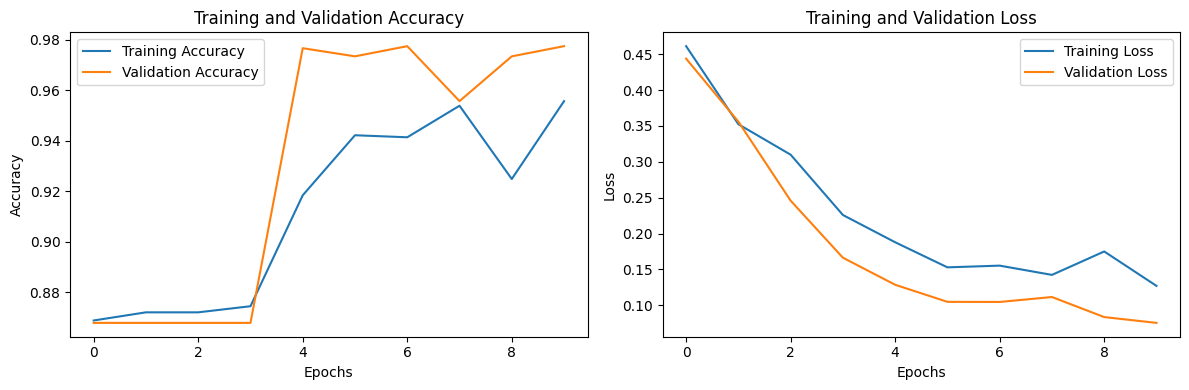

In [7]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
# Evaluate the model
y_pred_probs = model.predict(X_val)
y_pred = (y_pred_probs > 0.5).astype(int)
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


39/39 ━━━━━━━━━━━━━━━━━━━━ 14s 354ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       164
           1       0.98      0.99      0.99      1078

    accuracy                           0.98      1242
   macro avg       0.96      0.94      0.95      1242
weighted avg       0.98      0.98      0.98      1242

Confusion Matrix:
 [[ 146   18]
 [  10 1068]]


Saving C100P61ThinF_IMG_20150918_144104_cell_162.png to C100P61ThinF_IMG_20150918_144104_cell_162.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


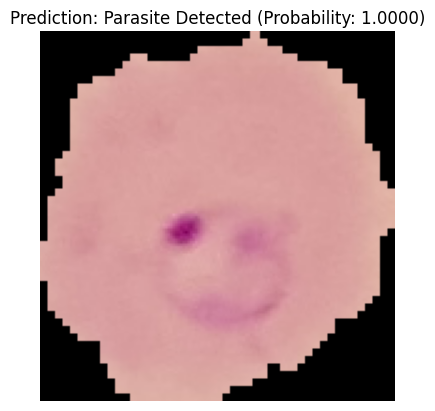

In [11]:
from google.colab import files

def preprocess_uploaded_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    return np.expand_dims(img_array, axis=0)

# Upload and predict
uploaded_file = files.upload()
img_path = list(uploaded_file.keys())[0]
processed_image = preprocess_uploaded_image(img_path)

prediction_prob = model.predict(processed_image)[0][0]
prediction = "Parasite Detected" if prediction_prob > 0.5 else "Healthy Cell Detected"

# Display uploaded image and prediction
plt.figure()
uploaded_image = image.load_img(img_path)
plt.imshow(uploaded_image)
plt.axis('off')
plt.title(f"Prediction: {prediction} (Probability: {prediction_prob:.4f})")
plt.show()
